# TRANSFORMACION DE DATOS

## SET UP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Automcompletar rápido
%config IPCompleter.greedy=True

#Formato de display
pd.options.display.float_format = '{:15.2f}'.format

## CARGA DE DATOS

In [2]:
df = pd.read_pickle('../Datos_3/df.pickle')
df

,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,irradiacion
fecha,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136472 entries, 2020-05-15 00:00:00 to 2020-06-17 23:45:00
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   planta       136472 non-null  object 
 1   inverter_id  136472 non-null  object 
 2   kw_dc        136472 non-null  float64
 3   kw_ac        136472 non-null  float64
 4   kw_dia       136472 non-null  float64
 5   kw_total     136472 non-null  float64
 6   sensor_id    136472 non-null  object 
 7   t_ambiente   136472 non-null  float64
 8   t_modulo     136472 non-null  float64
 9   irradiacion  136472 non-null  float64
dtypes: float64(7), object(3)
memory usage: 11.5+ MB


## CREACION DE VARIABLES

Comenzamos por extraer los componentes de la fecha e incorporarlos como nuevas variables.

In [5]:
def componentes_fecha(dataframe):
    mes = dataframe.index.month
    dia = dataframe.index.day
    hora = dataframe.index.hour
    minuto = dataframe.index.minute
    
    
    return(pd.DataFrame({'mes':mes, 'dia':dia, 'hora':hora, 'minuto':minuto}))

In [6]:
df = pd.concat([df.reset_index(),componentes_fecha(df)], axis = 1).set_index('fecha')
df

,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,irradiacion,mes,dia,hora,minuto
fecha,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45


Vamos a crear la variable eficiencia del inverter, que consiste en el porcentaje de DC que transforma a AC satisfactoriamente.

Creamos la función para poder corregir errores de división por 0 si el DC llega a ser 0 en algún momento.

In [7]:
def eficiencia_inverter(AC,DC):
    temp = AC / DC * 100
    return(temp.fillna(0))

In [8]:
df['eficiencia'] = eficiencia_inverter(df.kw_ac, df.kw_dc)

Comprobamos que no haya generado nulos.

In [9]:
df.eficiencia.isna().sum()

0

Visualizamos la eficiencia a nivel global.

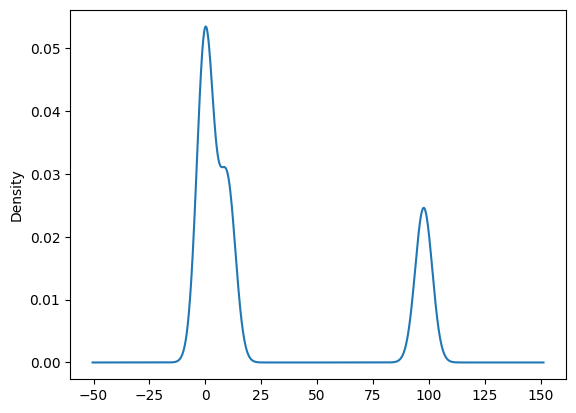

In [10]:
df.eficiencia.plot.kde();

Vemos un dato importante.

Hay dos grupos claramente diferenciados y uno de ellos es claramente ineficiente.

Lo dejamos para más adelante revisar que entidad es la que está teniendo problemas: planta, inverter, etc.

## REORDENACION DEL DATAFRAME

En este caso es muy importante no empezar a analizar por analizar, si no seguir el plan definido en el diseño del proyecto, ya que existe un orden muy claro en el proceso: factores ambientales --> kw_dc --> kw ac.

Así que vamos a reorganizar las columnas del df para que nos ayude a interpretar en este orden.

In [11]:
df

,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,irradiacion,mes,dia,hora,minuto,eficiencia
fecha,,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45,0.00
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45,0.00
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45,0.00


In [12]:
orden = ['planta','mes','dia','hora','minuto','sensor_id','irradiacion','t_ambiente','t_modulo','inverter_id','kw_dc','kw_ac','eficiencia','kw_dia','kw_total']

In [13]:
df = df[orden]
df

,planta,mes,dia,hora,minuto,sensor_id,irradiacion,t_ambiente,t_modulo,inverter_id,kw_dc,kw_ac,eficiencia,kw_dia,kw_total
fecha,,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1BY6WEcLGh8j5v7,0.00,0.00,0.00,0.00,6259559.00
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1IF53ai7Xc0U56Y,0.00,0.00,0.00,0.00,6183645.00
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,3PZuoBAID5Wc2HD,0.00,0.00,0.00,0.00,6987759.00
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,7JYdWkrLSPkdwr4,0.00,0.00,0.00,0.00,7602960.00
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,McdE0feGgRqW7Ca,0.00,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,q49J1IKaHRwDQnt,0.00,0.00,0.00,4157.00,520758.00
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,rrq4fwE8jgrTyWY,0.00,0.00,0.00,3931.00,121131356.00
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,vOuJvMaM2sgwLmb,0.00,0.00,0.00,4322.00,2427691.00


## DATAFRAME DIARIO

En nivel de análisis al que tenemos los datos es cada 15 minutos, lo cual puede ser demasiado desagregado para ciertos análisis.

Vamos a dejar construída una versión del dataframe agregada a nivel dia.

In [16]:
df.head()

,planta,mes,dia,hora,minuto,sensor_id,irradiacion,t_ambiente,t_modulo,inverter_id,kw_dc,kw_ac,eficiencia,kw_dia,kw_total
fecha,,,,,,,,,,,,,,,
2020-05-15,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1BY6WEcLGh8j5v7,0.00,0.00,0.00,0.00,6259559.00
2020-05-15,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1IF53ai7Xc0U56Y,0.00,0.00,0.00,0.00,6183645.00
2020-05-15,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,3PZuoBAID5Wc2HD,0.00,0.00,0.00,0.00,6987759.00
2020-05-15,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,7JYdWkrLSPkdwr4,0.00,0.00,0.00,0.00,7602960.00
2020-05-15,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,McdE0feGgRqW7Ca,0.00,0.00,0.00,0.00,7158964.00


In [17]:
df_dia = df.groupby(['planta', 'inverter_id']).resample('D').agg({
    'irradiacion': ['min', 'mean', 'max'],
    't_ambiente': ['min', 'mean', 'max'],
    't_modulo': ['min', 'mean', 'max'],
    'kw_dc': ['min', 'mean', 'max', 'sum'],
    'kw_ac': ['min', 'mean', 'max', 'sum'],
    'eficiencia': ['min', 'mean', 'max'],
    'kw_dia': 'max',
    'kw_total': 'max'
})
df_dia

irradiacion                  \
                                              min            mean   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15            0.00            0.20   
                       2020-05-16            0.00            0.21   
                       2020-05-17            0.00            0.24   
                       2020-05-18            0.00            0.16   
                       2020-05-19            0.00            0.19   
...                                           ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13            0.00            0.22   
                       2020-06-14            0.00            0.23   
                       2020-06-15            0.00            0.19   
                       2020-06-16            0.00            0.17   
                       2020-06-17            0.00            0.12   

                                                       t_ambiente  \
                                              max             min   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15            0.89           22.04   
                       2020-05-16            0.81           21.50   
                       2020-05-17            1.00           21.21   
                       2020-05-18            0.97           20.96   
                       2020-05-19            0.84           22.39   
...                                           ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13            0.93           22.20   
                       2020-06-14            0.92           23.65   
                       2020-06-15            0.83           24.00   
                       2020-06-16            0.77           23.63   
                       2020-06-17            0.58           22.55   

                                                                   \
                                             mean             max   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15           27.43           34.43   
                       2020-05-16           26.78           32.52   
                       2020-05-17           26.69           35.25   
                       2020-05-18           23.85           28.37   
                       2020-05-19           25.34           30.37   
...                                           ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13           26.12           31.91   
                       2020-06-14           27.02           32.96   
                       2020-06-15           26.56           31.61   
                       2020-06-16           26.37           30.83   
                       2020-06-17           24.85           29.04   

                                         t_modulo                  \
                                              min            mean   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15           20.29           32.58   
                       2020-05-16           19.59           31.86   
                       2020-05-17           20.38           32.74   
                       2020-05-18           19.48           27.81   
                       2020-05-19           20.06           29.73   
...                                           ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13           20.88           30.39   
                       2020-06-14           22.12           31.59   
                       2020-06-15           23.00           30.00   
                       2020-06-16           22.56           29.59   
                       2020-06-17           21.91           26.67   

                                                            kw_dc  ...  \
                                              max             min  ...   
planta inverter_id    

Nos lo ha generado con multi índice, tanto en filas como en columnas.

Para quitar el de las columnas podemos aplanar los nombres con .to_flat_index().

In [18]:
tuplas = df_dia.columns.to_flat_index()
tuplas

Index([ ('irradiacion', 'min'), ('irradiacion', 'mean'),
        ('irradiacion', 'max'),   ('t_ambiente', 'min'),
        ('t_ambiente', 'mean'),   ('t_ambiente', 'max'),
           ('t_modulo', 'min'),    ('t_modulo', 'mean'),
           ('t_modulo', 'max'),        ('kw_dc', 'min'),
             ('kw_dc', 'mean'),        ('kw_dc', 'max'),
              ('kw_dc', 'sum'),        ('kw_ac', 'min'),
             ('kw_ac', 'mean'),        ('kw_ac', 'max'),
              ('kw_ac', 'sum'),   ('eficiencia', 'min'),
        ('eficiencia', 'mean'),   ('eficiencia', 'max'),
             ('kw_dia', 'max'),     ('kw_total', 'max')],
      dtype='object')

Y unimos ambas partes del par con un guión bajo usando .join

In [19]:
df_dia.columns = ["_".join(par) for par in tuplas]
df_dia

irradiacion_min  irradiacion_mean  \
planta inverter_id     fecha                                           
p1     1BY6WEcLGh8j5v7 2020-05-15             0.00              0.20   
                       2020-05-16             0.00              0.21   
                       2020-05-17             0.00              0.24   
                       2020-05-18             0.00              0.16   
                       2020-05-19             0.00              0.19   
...                                            ...               ...   
p2     xoJJ8DcxJEcupym 2020-06-13             0.00              0.22   
                       2020-06-14             0.00              0.23   
                       2020-06-15             0.00              0.19   
                       2020-06-16             0.00              0.17   
                       2020-06-17             0.00              0.12   

                                   irradiacion_max  t_ambiente_min  \
planta inverter_id     fecha                                         
p1     1BY6WEcLGh8j5v7 2020-05-15             0.89           22.04   
                       2020-05-16             0.81           21.50   
                       2020-05-17             1.00           21.21   
                       2020-05-18             0.97           20.96   
                       2020-05-19             0.84           22.39   
...                                            ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13             0.93           22.20   
                       2020-06-14             0.92           23.65   
                       2020-06-15             0.83           24.00   
                       2020-06-16             0.77           23.63   
                       2020-06-17             0.58           22.55   

                                   t_ambiente_mean  t_ambiente_max  \
planta inverter_id     fecha                                         
p1     1BY6WEcLGh8j5v7 2020-05-15            27.43           34.43   
                       2020-05-16            26.78           32.52   
                       2020-05-17            26.69           35.25   
                       2020-05-18            23.85           28.37   
                       2020-05-19            25.34           30.37   
...                                            ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13            26.12           31.91   
                       2020-06-14            27.02           32.96   
                       2020-06-15            26.56           31.61   
                       2020-06-16            26.37           30.83   
                       2020-06-17            24.85           29.04   

                                     t_modulo_min   t_modulo_mean  \
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15           20.29           32.58   
                       2020-05-16           19.59           31.86   
                       2020-05-17           20.38           32.74   
                       2020-05-18           19.48           27.81   
                       2020-05-19           20.06           29.73   
...                                           ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13           20.88           30.39   
                       2020-06-14           22.12           31.59   
                       2020-06-15           23.00           30.00   
                       2020-06-16           22.56           29.59   
                       2020-06-17           21.91           26.67   

                                     t_modulo_max       kw_dc_min  ...  \
planta inverter_id     fecha                                       ...   
p1     1BY6WEcLGh8j5v7 2020-05-15           55.03            0.00  ...   
                       2020-05-16           54.23            0.00  ...   
                       2020-05-17           63.15            0.00  ...   
        

Ahora tenemos que pasar planta e inverter_id a columnas, y dejar la fecha como el índice.

In [20]:
df_dia = df_dia.reset_index().set_index('fecha')
df_dia

,planta,inverter_id,irradiacion_min,irradiacion_mean,irradiacion_max,t_ambiente_min,t_ambiente_mean,t_ambiente_max,t_modulo_min,t_modulo_mean,...,kw_dc_sum,kw_ac_min,kw_ac_mean,kw_ac_max,kw_ac_sum,eficiencia_min,eficiencia_mean,eficiencia_max,kw_dia_max,kw_total_max
fecha,,,,,,,,,,,,,,,,,,,,,
2020-05-15,p1,1BY6WEcLGh8j5v7,0.00,0.20,0.89,22.04,27.43,34.43,20.29,32.58,...,235340.70,0.00,247.81,1039.35,23046.55,0.00,5.26,9.82,5754.00,6265313.00
2020-05-16,p1,1BY6WEcLGh8j5v7,0.00,0.21,0.81,21.50,26.78,32.52,19.59,31.86,...,256629.88,0.00,285.51,1095.29,25124.49,0.00,5.56,9.83,6292.00,6271605.00
2020-05-17,p1,1BY6WEcLGh8j5v7,0.00,0.24,1.00,21.21,26.69,35.25,20.38,32.74,...,288039.82,0.00,293.47,1114.81,28172.85,0.00,4.99,9.82,7045.00,6278650.00
2020-05-18,p1,1BY6WEcLGh8j5v7,0.00,0.16,0.97,20.96,23.85,28.37,19.48,27.81,...,204030.30,0.00,208.03,1193.63,19970.51,0.00,4.99,9.83,4998.00,6283648.00
2020-05-19,p1,1BY6WEcLGh8j5v7,0.00,0.19,0.84,22.39,25.34,30.37,20.06,29.73,...,232277.27,0.00,244.53,1059.80,22741.18,0.00,4.63,9.83,6449.00,6290097.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-13,p2,xoJJ8DcxJEcupym,0.00,0.22,0.93,22.20,26.12,31.91,20.88,30.39,...,27443.74,0.00,279.59,1239.95,26840.58,0.00,51.91,98.29,6632.00,209312200.00
2020-06-14,p2,xoJJ8DcxJEcupym,0.00,0.23,0.92,23.65,27.02,32.96,22.12,31.59,...,30768.78,0.00,313.43,1328.21,30088.97,0.00,51.94,99.92,7268.00,209319687.00
2020-06-15,p2,xoJJ8DcxJEcupym,0.00,0.19,0.83,24.00,26.56,31.61,23.00,30.00,...,25597.24,0.00,260.93,1256.67,25049.49,0.00,52.94,98.27,7412.67,209325949.00


Ya tenemos preparados nuestros datasets por hora y por día.

Los guardamos.

In [22]:
df.to_pickle('../Datos_3/df.pickle')
df_dia.to_pickle('../Datos_3/df_dia.pickle')